In [4]:
from PIL import Image
from skimage import exposure, io
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from os.path import join

In [7]:
df = pd.read_csv(join("dataset", "name_images.csv"), index_col=0)
df.head()

,filename,label
0,DIESTRO_142_4.jpg,DIESTRO
1,DIESTRO_143_4.jpg,DIESTRO
2,DIESTRO_144_4.jpg,DIESTRO
3,DIESTRO_145_4.jpg,DIESTRO
4,DIESTRO_150_4.jpg,DIESTRO


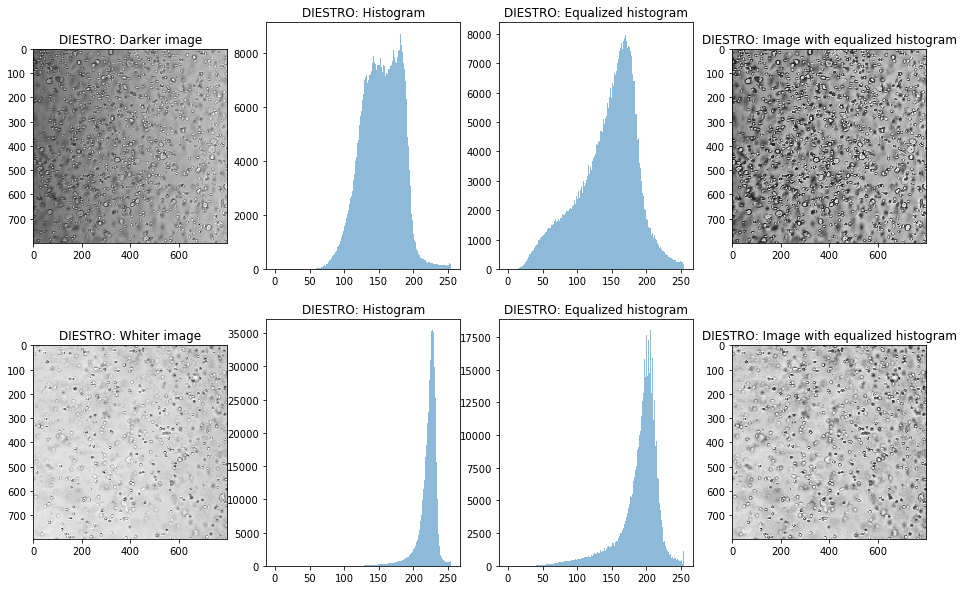

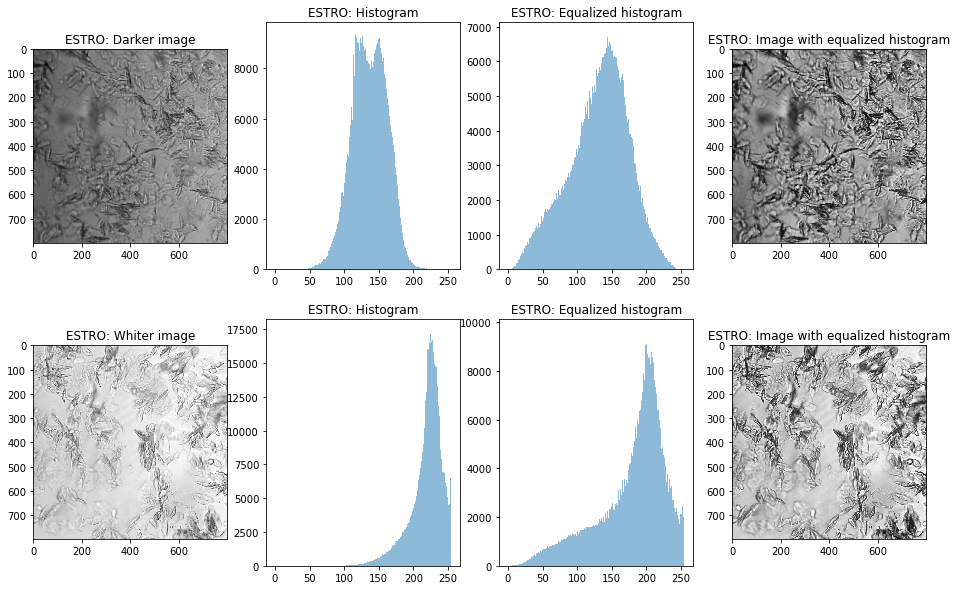

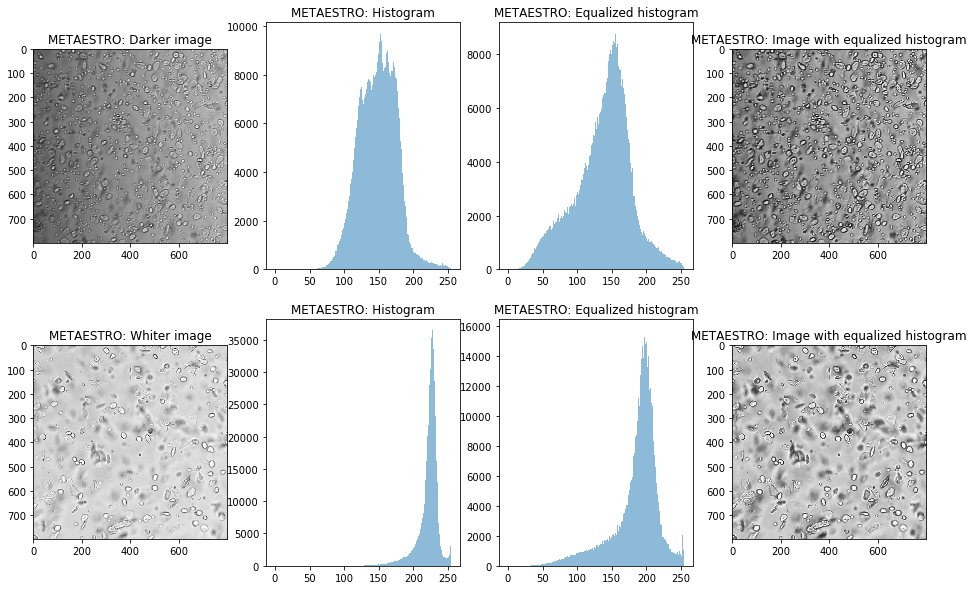

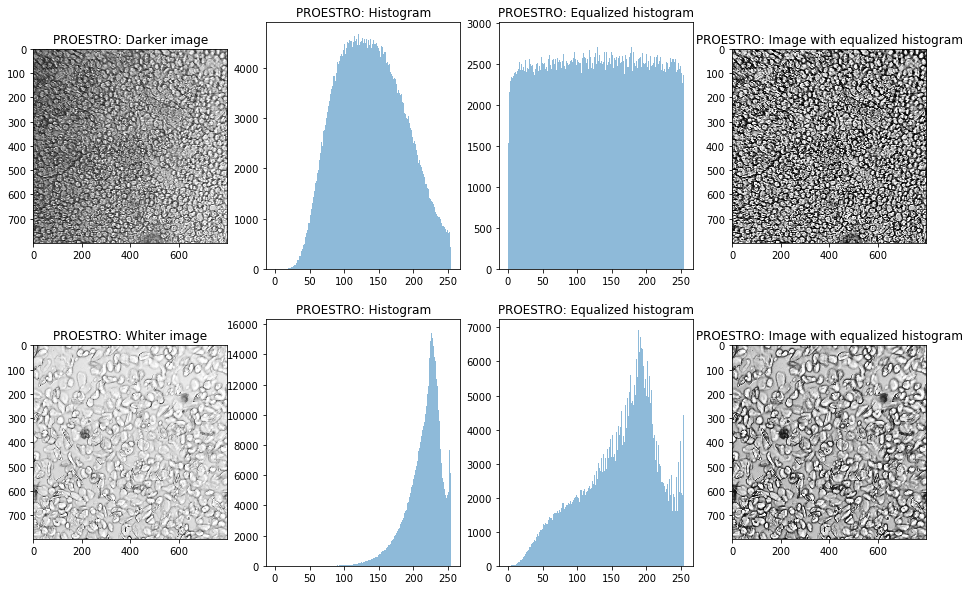

In [9]:
plt.rcParams['figure.figsize'] = [16, 10]
for label in df.label.unique():
    cells = df[df.label == label]
    images = [(io.imread(("dataset", "images", filename), as_gray=True) * 255).astype(np.uint8) for filename in cells.filename.values]
    means = np.array([image.mean() for image in images])
    
    darker_image = images[means.argmin()]
    darker_image_eq = (exposure.equalize_adapthist(darker_image) * 255).astype(np.uint8)
    whiter_image = images[means.argmax()]
    whiter_image_eq = (exposure.equalize_adapthist(whiter_image) * 255).astype(np.uint8)

    bins = np.linspace(0, 255, 256)
    plt.subplot(2, 4, 1)
    plt.title("{}: Darker image".format(label))
    plt.imshow(Image.fromarray(darker_image), cmap = 'gist_gray')
    
    plt.subplot(2, 4, 2)
    plt.title("{}: Histogram".format(label))
    plt.hist(darker_image.reshape(-1), bins, alpha=0.5);
    
    plt.subplot(2, 4, 3)
    plt.title("{}: Equalized histogram".format(label))
    plt.hist(darker_image_eq.reshape(-1), bins, alpha=0.5);
    
    plt.subplot(2, 4, 4)
    plt.title("{}: Image with equalized histogram".format(label))
    plt.imshow(Image.fromarray(darker_image_eq), cmap = 'gist_gray');
#--------------------------------------------------------------------------
    plt.subplot(2, 4, 5)
    plt.title("{}: Whiter image".format(label))
    plt.imshow(Image.fromarray(whiter_image), cmap = 'gist_gray');
    
    plt.subplot(2, 4, 6)
    plt.title("{}: Histogram".format(label))
    plt.hist(whiter_image.reshape(-1), bins, alpha=0.5);
    
    plt.subplot(2, 4, 7)
    plt.title("{}: Equalized histogram".format(label))
    plt.hist(whiter_image_eq.reshape(-1), bins, alpha=0.5);
    
    plt.subplot(2, 4, 8)
    plt.title("{}: Image with equalized histogram".format(label));
    plt.imshow(Image.fromarray(whiter_image_eq), cmap = 'gist_gray');
    
    plt.show()